In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pipeline import KernelPipeline
from e_pike import EfficientPIKE

In [2]:
def generate_realistic_maldi_data(num_samples, num_mz_values, noise_level=0.05):
    mz_values = np.arange(num_mz_values)
    data = np.zeros((num_samples, num_mz_values))

    for i in range(num_samples):
        for _ in range(np.random.randint(low=50, high=100)):
            peak_center = np.random.randint(0, num_mz_values)
            peak_height = np.random.exponential(scale=1000)
            peak_width = np.random.uniform(1, 10)
            
            peak = peak_height * np.exp(-((mz_values - peak_center)**2) / (2 * peak_width**2))
            data[i] += peak
    
    data += np.random.normal(scale=noise_level, size=data.shape)

    data = np.clip(data, 0, None) 
    data = (data - data.min()) / (data.max() - data.min())
    df = pd.DataFrame(data, columns=mz_values)
    
    return df

def plot_matrix(matrix, title, subplot_position, num_plots):
    """Plots a matrix with a title."""
    plt.subplot(1, num_plots, subplot_position)
    plt.imshow(matrix, aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Samples')

In [5]:
# Generate MALDI data
num_samples = 100
num_mz_values = 1000
noise_level = 0.5
maldi_data = generate_realistic_maldi_data(num_samples, num_mz_values, noise_level)

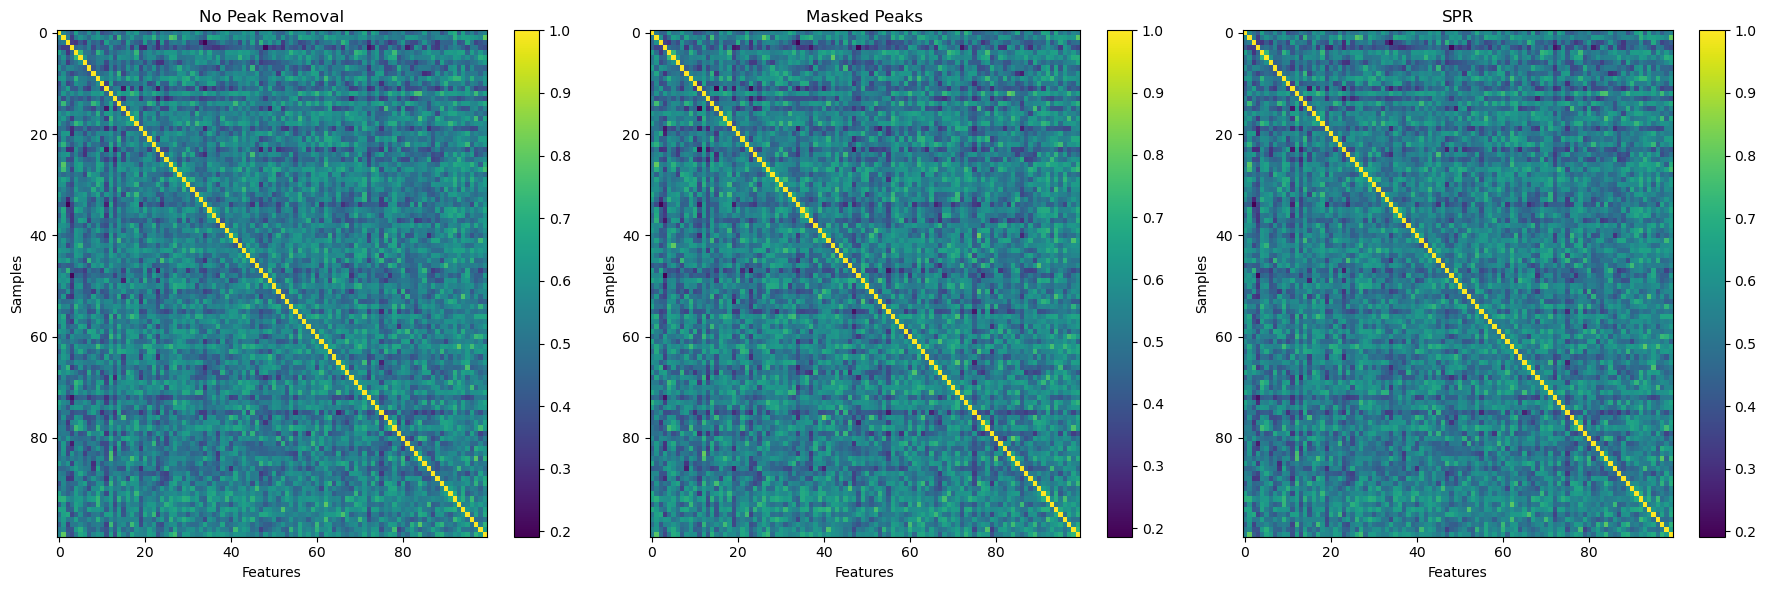

In [6]:
# Variables
bin_size = 3
t = 4
th = 1e-6
masking_window = 5
common_peaks = np.random.randint(low=0, high=num_mz_values, size=20)

# Initialize pipelines
pipeline_no_peak_removal = KernelPipeline()
pipeline_masked = KernelPipeline(peak_removal='masked', common_peaks=common_peaks)
pipeline_spr = KernelPipeline(peak_removal='spr', common_peaks=common_peaks)

# Run pipelines
norm_kernel_no_peak_removal = pipeline_no_peak_removal(maldi_data, bin_size, t, th, masking_window)
norm_kernel_masked = pipeline_masked(maldi_data, bin_size, t, th, masking_window)
norm_kernel_spr = pipeline_spr(maldi_data, bin_size, t, th, masking_window)

# Plot results
plt.figure(figsize=(18, 6))

plot_matrix(norm_kernel_no_peak_removal, 'No Peak Removal', 1, 3)
plot_matrix(norm_kernel_masked, 'Masked Peaks', 2, 3)
plot_matrix(norm_kernel_spr, 'SPR', 3, 3)

plt.tight_layout()
plt.show()